In [ ]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/dataset/latihan/dataset_datapjj2.xlsx')
dataset

,komentar,label
0,"@schfess wah sama nder, adek gw juga dikenal r...",0
1,"Mulai sibuk gmeet, buat materi, absen, laporan...",1
2,"@ssefnum tadi pas pjj, gurunya ilang jadi gue ...",0
3,"ah, masa sih. kata temen-temen saya gara gara ...",0
4,hari kedua pjj trs gurunya ngasih tugas agama ...,0
...,...,...
718,Beliau menyampaikan bahwa dunia pendidikan did...,1
719,Kendati hasil uji coba simulasi Pembelajaran T...,1
720,"Kasus Covid-19 Masih Tinggi, Disdik Bandung Sk...",1
721,"Kemdikbudristek, Segera Perpanjang Pembelajara...",1


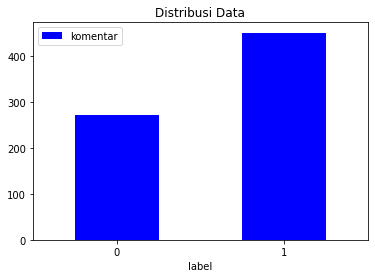

In [ ]:
ax = dataset.groupby('label').count().plot(kind='bar', title='Distribusi Data', color='blue')
ax.set_xticklabels(dataset['label'], rotation=0)
komentar, label = list(dataset['komentar']), list(dataset['label'])

In [ ]:
columns = dataset.columns
columns

Index(['komentar', 'label'], dtype='object')

In [ ]:
y = dataset['label']

#prepos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['komentar'], y, test_size = 0.2, random_state=42)
print('X Train shape: ', X_train.shape)
print('X Test shape: ', X_test.shape)
print('y Train shape: ', y_train.shape)
print('y Ttest shape: ', y_test.shape)

X Train shape:  (578,)
X Test shape:  (145,)
y Train shape:  (578,)
y Ttest shape:  (145,)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 10000
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(X_train)
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
word2vec = tokenizer.word_index
word2vec

{'pjj': 1,
 't': 2,
 'https': 3,
 'co': 4,
 'pembelajaran': 5,
 'ini': 6,
 'jarak': 7,
 'jauh': 8,
 'yang': 9,
 'mulai': 10,
 'hari': 11,
 'di': 12,
 'aku': 13,
 'dan': 14,
 'udah': 15,
 'baru': 16,
 'lagi': 17,
 'ada': 18,
 'yg': 19,
 'ga': 20,
 'gue': 21,
 'semangat': 22,
 'besok': 23,
 'ya': 24,
 'nya': 25,
 'dah': 26,
 'sekolah': 27,
 'masih': 28,
 'buat': 29,
 'anak': 30,
 'tahun': 31,
 'tapi': 32,
 'pas': 33,
 'aja': 34,
 'bisa': 35,
 'jadi': 36,
 'juga': 37,
 'selama': 38,
 'untuk': 39,
 'guru': 40,
 'kalo': 41,
 'mau': 42,
 'jam': 43,
 'pagi': 44,
 'dengan': 45,
 'udh': 46,
 'dari': 47,
 '2021': 48,
 'kelas': 49,
 'sama': 50,
 'pandemi': 51,
 'orang': 52,
 'online': 53,
 'belajar': 54,
 'banget': 55,
 'belum': 56,
 'gak': 57,
 'si': 58,
 'kalian': 59,
 'pertama': 60,
 'apa': 61,
 'ke': 62,
 'tugas': 63,
 'ni': 64,
 'bgt': 65,
 '2': 66,
 'gadget': 67,
 'tp': 68,
 'sih': 69,
 'karena': 70,
 'siswa': 71,
 '1': 72,
 'pada': 73,
 'tidak': 74,
 'atau': 75,
 'ajaran': 76,
 'saya': 77,

In [ ]:
P = len(word2vec)
print('dataset mempunyai %s nomor dari independen token' %P)

dataset mempunyai 3205 nomor dari independen token


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train = pad_sequences(sequence_train)
data_train.shape

(578, 54)

In [ ]:
T = data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(145, 54)

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, GlobalMaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [ ]:
D=20
i=Input((T,))
x=Embedding(P+1,D)(i)
x=Conv1D(32,3, activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5, activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 54)]              0         
_________________________________________________________________
embedding_28 (Embedding)     (None, 54, 20)            64120     
_________________________________________________________________
conv1d_84 (Conv1D)           (None, 52, 32)            1952      
_________________________________________________________________
max_pooling1d_56 (MaxPooling (None, 17, 32)            0         
_________________________________________________________________
conv1d_85 (Conv1D)           (None, 15, 64)            6208      
_________________________________________________________________
max_pooling1d_57 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
conv1d_86 (Conv1D)           (None, 3, 128)            247

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_sentimen = model.fit(data_train, y_train, validation_data=(data_test, y_test), epochs=20, steps_per_epoch=28)

Epoch 1/20
28/28 [==============================] - 1s 13ms/step - loss: 3.7541e-05 - accuracy: 1.0000 - val_loss: 1.7332 - val_accuracy: 0.7379
Epoch 2/20
28/28 [==============================] - 0s 8ms/step - loss: 1.4805e-05 - accuracy: 1.0000 - val_loss: 1.7890 - val_accuracy: 0.7379
Epoch 3/20
28/28 [==============================] - 0s 7ms/step - loss: 0.0132 - accuracy: 0.9983 - val_loss: 2.0335 - val_accuracy: 0.6759
Epoch 4/20
28/28 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.6340 - val_accuracy: 0.7034
Epoch 5/20
28/28 [==============================] - 0s 6ms/step - loss: 5.0366e-04 - accuracy: 1.0000 - val_loss: 1.9942 - val_accuracy: 0.7241
Epoch 6/20
28/28 [==============================] - 0s 7ms/step - loss: 5.2580e-06 - accuracy: 1.0000 - val_loss: 1.9850 - val_accuracy: 0.7172
Epoch 7/20
28/28 [==============================] - 0s 7ms/step - loss: 5.1042e-06 - accuracy: 1.0000 - val_loss: 1.9906 - val_accuracy: 0.7241

In [ ]:
scores = model.evaluate(data_test, y_test, verbose=0)
print('Testing Accuraccy: %.2f%%' % (scores[1]*100))
scores2 = model.evaluate(data_train, y_train, verbose=0)
print('Training Accuraccy: %.2f%%' % (scores2[1]*100))

Testing Accuraccy: 73.79%
Training Accuraccy: 100.00%


In [ ]:
y_pred = model.predict(data_test)
y_pred

array([[9.99998450e-01, 1.49435903e-06, 1.44861999e-23, 1.74509096e-23,
        4.39583589e-23],
       [9.96140778e-01, 3.85929039e-03, 1.41303858e-08, 1.02084732e-08,
        1.95453804e-08],
       [1.00559818e-08, 1.00000000e+00, 2.66042490e-21, 5.33627057e-21,
        6.81782940e-21],
       [1.33229842e-05, 9.99986649e-01, 5.87767479e-09, 5.41930367e-09,
        6.45064890e-09],
       [2.09245831e-01, 7.85842896e-01, 1.60951493e-03, 1.60416693e-03,
        1.69752981e-03],
       [1.75224147e-06, 9.99998212e-01, 4.42024611e-10, 3.97662264e-10,
        4.83805218e-10],
       [1.72695559e-06, 9.99998331e-01, 4.36254494e-14, 6.37599240e-14,
        6.11834395e-14],
       [1.20142877e-05, 9.99987960e-01, 1.41686676e-10, 1.23075078e-10,
        1.45877338e-10],
       [2.77425981e-11, 1.00000000e+00, 4.94289138e-29, 5.66065718e-29,
        1.02513784e-28],
       [5.49780011e-01, 4.50149029e-01, 2.32381790e-05, 2.02870706e-05,
        2.73698333e-05],
       [2.78974593e-01, 7.2102

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Text(33.0, 0.5, 'Nilai Sebenarnya')

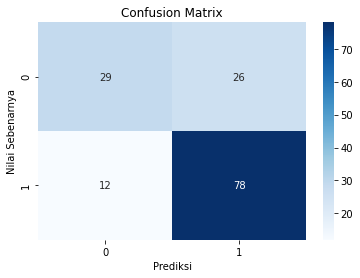

In [ ]:
cm=confusion_matrix(y_test, y_pred)
ax=sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Prediksi')
ax.set_ylabel('Nilai Sebenarnya')

In [ ]:
print('Classification Report: ')
cr = classification_report(y_test,y_pred)
print(cr)

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.53      0.60        55
           1       0.75      0.87      0.80        90

    accuracy                           0.74       145
   macro avg       0.73      0.70      0.70       145
weighted avg       0.73      0.74      0.73       145



In [ ]:
import matplotlib.pyplot as plt

def render_training(training_hist):
  loss = training_hist.history['loss']
  val_loss = training_hist.history['val_loss']

  accuracy = training_hist.history['accuracy']
  val_accuracy = training_hist.history['val_accuracy']

  plt.figure(figsize=(14,4))

  plt.subplot(1,2,1)
  plt.title('Plot Loss Validation')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(loss, label='Training set')
  plt.plot(val_loss, label='Test set')
  plt.legend()
  plt.grid(linestyle='--', linewidth=1, alpha=0.5)

  plt.subplot(1,2,2)
  plt.title('Plot Accuracy Validation')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(accuracy, label='Training set')
  plt.plot(val_accuracy, label='Test set')
  plt.legend()
  plt.grid(linestyle='--', linewidth=1, alpha=0.5)

  plt.show()

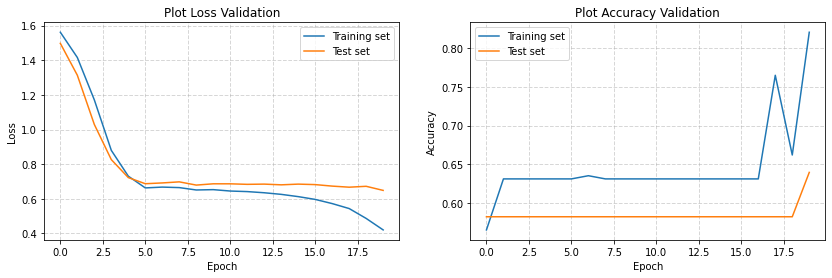

In [ ]:
render_training(cnn_sentimen)